In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

In [13]:
checkerboard_size = (8, 4)
frame_size = (1280, 960)

termination_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# object points
objp = np.zeros((checkerboard_size[0] * checkerboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:checkerboard_size[0], 0:checkerboard_size[1]].T.reshape(-1, 2)

objp = objp * 28 # 28 mm between each square

objpoints = []  # real world points
imgpointsL = [] # image points from left camera
imgpointsR = [] # image points from right camera

# Path to images captured from the left and right cameras
left_images = glob.glob('/Users/siddharthiyer/Documents/GitHub/cv-final-visual-impairment-assistance/camera calibration/checkboard calibration/images/left cam/*.png')
right_images = glob.glob('/Users/siddharthiyer/Documents/GitHub/cv-final-visual-impairment-assistance/camera calibration/checkboard calibration/images/right cam/*.png')

for imgLeft, imgRight in zip(left_images, right_images):
    imgL = cv2.imread(imgLeft)
    imgR = cv2.imread(imgRight)

    grayL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
    grayR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

    retL, cornersL = cv2.findChessboardCorners(grayL, checkerboard_size, None)
    retR, cornersR = cv2.findChessboardCorners(grayR, checkerboard_size, None)

    if retL and retR:
        print('hello')
        objpoints.append(objp)

        cornersL = cv2.cornerSubPix(grayL, cornersL, (11, 11), (-1, -1), termination_criteria)
        cornersR = cv2.cornerSubPix(grayR, cornersR, (11, 11), (-1, -1), termination_criteria)

        imgpointsL.append(cornersL)
        imgpointsR.append(cornersR)

        imgL = cv2.drawChessboardCorners(imgL, checkerboard_size, cornersL, retL)
        imgR = cv2.drawChessboardCorners(imgR, checkerboard_size, cornersR, retR)

        # Display images using matplotlib
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        plt.imshow(cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB))
        plt.title('Left Camera')
        plt.axis('off')

        plt.subplot(122)
        plt.imshow(cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB))
        plt.title('Right Camera')
        plt.axis('off')

        plt.show()

In [5]:
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.imshow(frame_rgb)
        plt.title("Webcam Image")
        plt.axis('off')  # Turn off axis numbers and ticks
        plt.show()

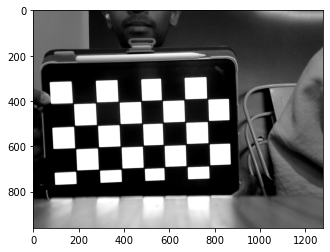

In [18]:
gray_image = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')